<a href="https://colab.research.google.com/github/Yesh7437/Yesh/blob/main/Minor_Project_verzeo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
plt.style.use('fivethirtyeight')

**IMPORTING DATA**

In [ ]:
crdt_card_df = pd.read_csv('/content/card_transdata.csv')
crdt_card_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
crdt_card_df.shape

(1000000, 8)

In [ ]:
crdt_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [ ]:
crdt_card_df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


**IMPUTING MISSING VALUES**

In [ ]:
crdt_card_df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

**EXPLORATORY DATA ANALYSIS**

In [ ]:
eda_df=crdt_card_df.copy()

In [ ]:
scaler_eda=MinMaxScaler()
eda_df[eda_df.columns]=scaler_eda.fit_transform(eda_df)

In [ ]:
eda_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.005443,0.000026,0.007250,1.0,1.0,0.0,0.0,0.0
1,0.001018,0.000015,0.004816,1.0,0.0,0.0,0.0,0.0
2,0.000478,0.000068,0.001581,1.0,0.0,0.0,1.0,0.0
3,0.000211,0.000473,0.001338,1.0,1.0,0.0,1.0,0.0
4,0.004156,0.000048,0.008284,1.0,1.0,0.0,1.0,0.0


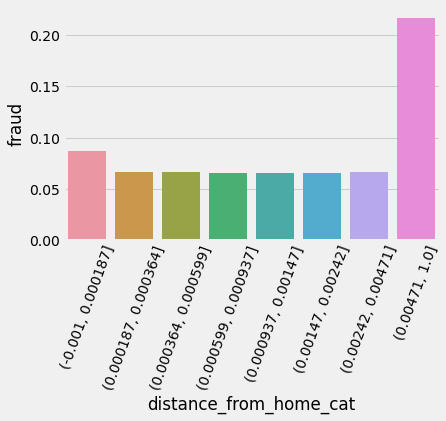

In [ ]:
eda_df['distance_from_home_cat']=pd.qcut(eda_df.distance_from_home,8)
bar=eda_df.groupby(by='distance_from_home_cat').mean()
sns.barplot(data=bar,x=bar.index,y='fraud');
plt.xticks(rotation=70);

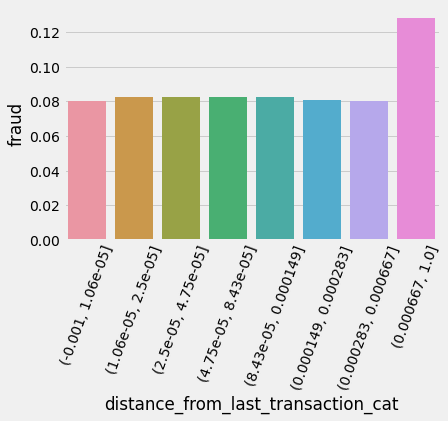

In [ ]:
eda_df['distance_from_last_transaction_cat']=pd.qcut(eda_df.distance_from_last_transaction,8)
bar=eda_df.groupby(by='distance_from_last_transaction_cat').mean()
sns.barplot(data=bar,x=bar.index,y='fraud');
plt.xticks(rotation=70);

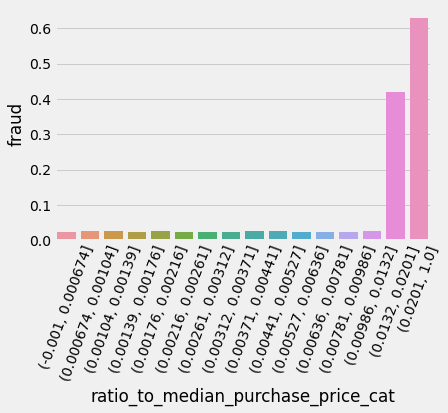

In [ ]:
eda_df['ratio_to_median_purchase_price_cat'] = pd.qcut(eda_df.ratio_to_median_purchase_price,16)
bar = eda_df.groupby(by='ratio_to_median_purchase_price_cat').mean()
sns.barplot(data=bar, x=bar.index, y='fraud');
plt.xticks(rotation=70);

Relationship with categorical Variables

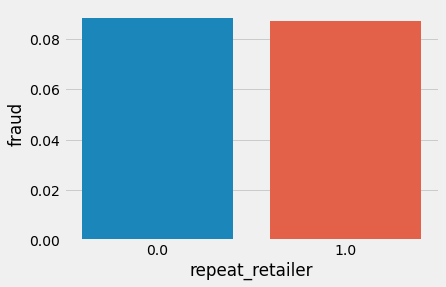

In [ ]:
bar = eda_df.groupby(by='repeat_retailer').mean()
sns.barplot(data=bar, x=bar.index, y='fraud');

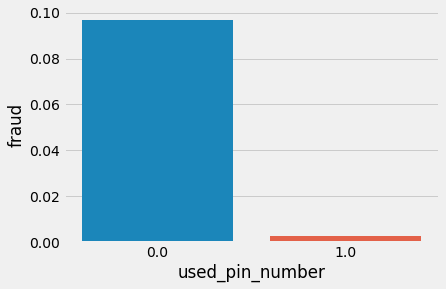

In [ ]:
bar = eda_df.groupby(by='used_pin_number').mean()
sns.barplot(data=bar, x=bar.index, y='fraud');

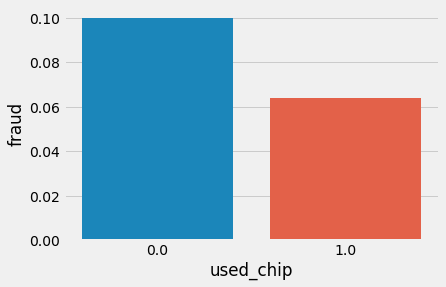

In [ ]:
bar = eda_df.groupby(by='used_chip').mean()
sns.barplot(data=bar, x=bar.index, y='fraud');

Building Machine Learning Models

In [ ]:
input_cols = ['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order']
target_col = 'fraud'

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(crdt_card_df[input_cols], crdt_card_df[target_col], test_size = 0.3)

1.Building Logistic Regression Model

In [ ]:
lr = LogisticRegression()
lr.fit(train_x,train_y)
print(classification_report(train_y,lr.predict(train_x)))
print('---------------------------------------------------------')
print(classification_report(test_y,lr.predict(test_x)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    638893
         1.0       0.89      0.58      0.70     61107

    accuracy                           0.96    700000
   macro avg       0.92      0.79      0.84    700000
weighted avg       0.95      0.96      0.95    700000

---------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273704
         1.0       0.89      0.58      0.70     26296

    accuracy                           0.96    300000
   macro avg       0.92      0.79      0.84    300000
weighted avg       0.95      0.96      0.95    300000



2.Buliding KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_x,train_y)
print(classification_report(train_y,knn.predict(train_x)))
print('---------------------------------------------------------')
print(classification_report(test_y,knn.predict(test_x)))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    638893
         1.0       0.94      0.96      0.95     61107

    accuracy                           0.99    700000
   macro avg       0.97      0.98      0.97    700000
weighted avg       0.99      0.99      0.99    700000

---------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    273704
         1.0       0.89      0.92      0.91     26296

    accuracy                           0.98    300000
   macro avg       0.94      0.96      0.95    300000
weighted avg       0.98      0.98      0.98    300000



3.Building a Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_x,train_y)
print(classification_report(train_y,dt.predict(train_x)))
print('---------------------------------------------------------')
print(classification_report(test_y,dt.predict(test_x)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    638893
         1.0       1.00      1.00      1.00     61107

    accuracy                           1.00    700000
   macro avg       1.00      1.00      1.00    700000
weighted avg       1.00      1.00      1.00    700000

---------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273704
         1.0       1.00      1.00      1.00     26296

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



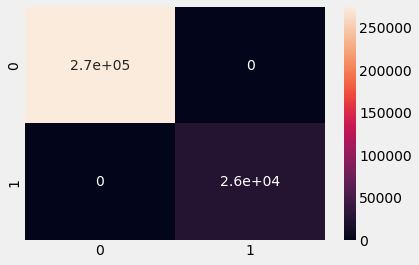

In [ ]:
sns.heatmap(confusion_matrix(test_y,dt.predict(test_x)), annot=True);

ROC AUC CURVES

Text(0, 0.5, 'True Positive Rate')

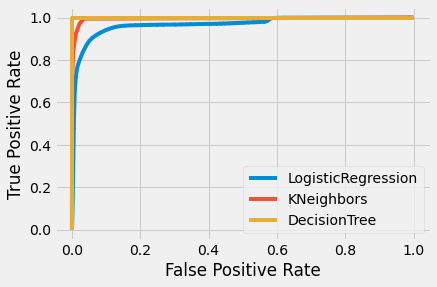

In [29]:
lr_x,lr_y,_ = roc_curve(test_y,lr.predict_proba(test_x)[:,1])
knn_x,knn_y,_ = roc_curve(test_y,knn.predict_proba(test_x)[:,1])
dt_x,dt_y,_ = roc_curve(test_y,dt.predict_proba(test_x)[:,1])

plt.plot(lr_x,lr_y,label='LogisticRegression')
plt.plot(knn_x,knn_y,label='KNeighbors')
plt.plot(dt_x,dt_y,label='DecisionTree')
plt.legend();
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')